# Algorytmy zachlanne dla zagadnienia komiwojazera

Dominik Matracki
408558

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict

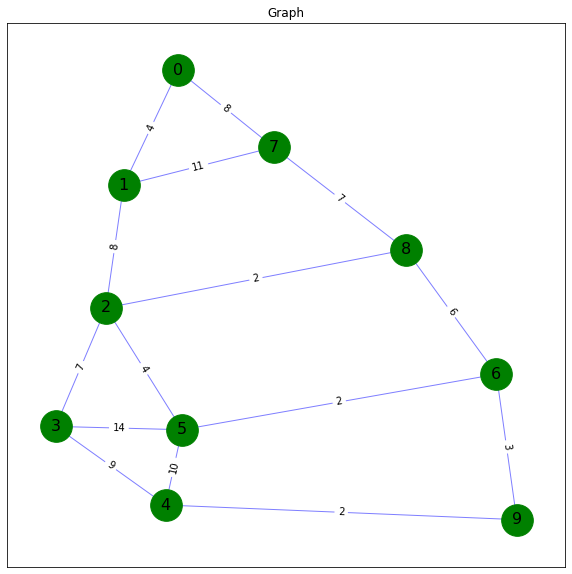

In [3]:
weights = [
    (0, 1, 4),
    (0, 7, 8),
    (1, 7, 11),
    (2, 1, 8),
    (2, 8, 2),
    (2, 5, 4),
    (2, 3, 7),
    (3, 4, 9),
    (3, 5, 14),
    (4, 5, 10),
    (5, 6, 2),
    (6, 8, 6),
    (7, 8, 7),
    (6, 9, 3),
    (9, 4, 2)
]

G = nx.Graph()

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(10)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()

Powyzszy algorytm ma zlozonosc obliczeniowa $O(|V|)$. Jego duza wada jest natomiast to ze jest to algorytm zachlanny zatem nie zawsze laczy on wszystkie wierzcholki. Pokazane jest to ponizej.

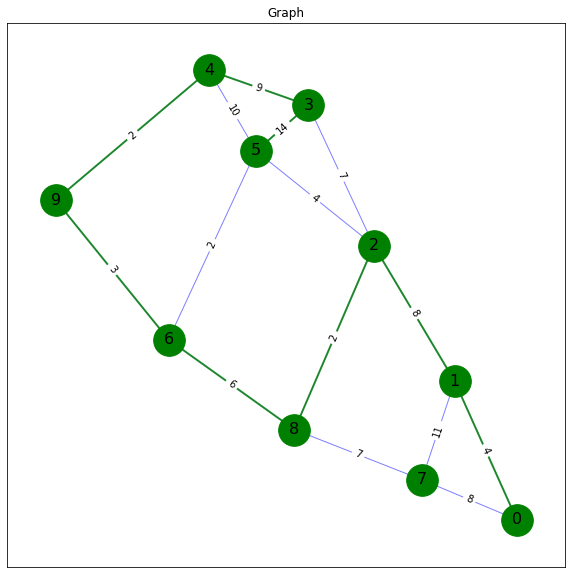

In [4]:
M = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))

def nearestNeighbour(G: List[List[int]], start: int) -> List[int]:
    current = start
    visited = []
    n = len(G)

    while len(visited) < n:
        visited.append(current)
        minimal = np.inf
        for i in range(n):
            if minimal > G[current][i] and G[current][i] > 0 and i not in visited:
                minimal = i

        if minimal == np.inf:
            return visited
        current = minimal

    return visited


def nodesToPath(nodes: List[int]):
    path = []
    for i in range(len(nodes) - 1):
        path.append((nodes[i], nodes[i+1]))
    return path


nodes = nearestNeighbour(M, 0)
path = nodesToPath(nodes)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(10)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=path, width=2,alpha=0.8,edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()


# Greedy G-TSP

In [5]:
from collections import deque

def notCycle(path, newEdge):

    start, end, weight = newEdge
    queue = deque([start])
    visited = []

    while len(queue) > 0:
        current = queue.popleft()
        visited.append(current)

        if current == end:
            return False

        if path.get(current) is not None:
            for node in path[current]:
                if node not in visited:
                    queue.append(node)

    return True


def addEdgeToPath(path, newEdge):
    start, end, weight = newEdge
    if path.get(start) is None:
        path[start] = [end]
    elif end not in path[start]:
        path[start].append(end)

    if path.get(end) is None:
        path[end] = [start]

    elif start not in path[end]:
        path[end].append(start)
    


def greedyTSP(G):
    edges = []
    n = len(G)
    for i in range(n):
        for j in range(n):
            if G[i][j] > 0:
                edges.append((i, j, G[i][j]))
    edges.sort(key=lambda x: x[2])
    
    path = dict()

    edgesCount = 0
    while edgesCount < n and len(edges) > 0:
        newEdge = edges.pop(0)
        if notCycle(path, newEdge):
            edgesCount += 1
            addEdgeToPath(path, newEdge)
    
    return path

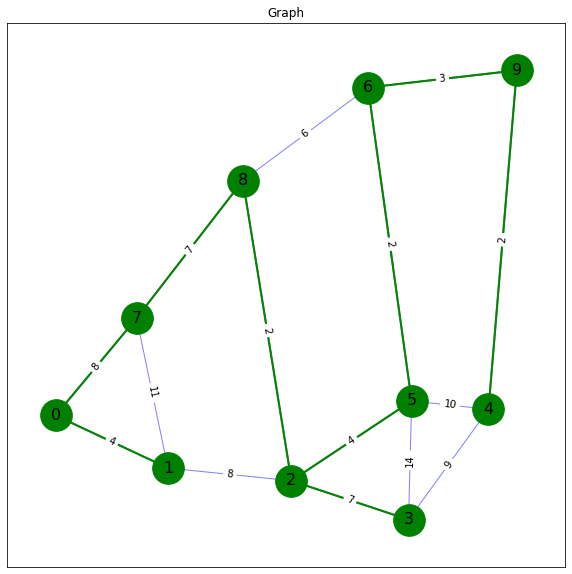

In [6]:
path = greedyTSP(M)
# print(path)
edgeList = set()

for key, values in path.items():
    for val in values:
        edgeList.add((key, val))


fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(10)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=list(edgeList), width=2,alpha=0.8,edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()


# Christofides Algorithm

In [7]:
class PriorityQueue:
    def __init__(self, queue=[]):
        self.queue = queue
    
    def __len__(self):
        return len(self.queue)
    
    def enqueue(self, value, priority):
        self.queue.append((value, priority))
        self.queue.sort(key=lambda item: item[1])

    def dequeue(self):
        return self.queue.pop(0)[0]
    
    def isEmpty(self):
        return len(self.queue) == 0
    


def dijkstraPrimAlgorithm(G, start):
    queue = PriorityQueue([(start, 0)])
    visited = []

    while len(queue) > 0:
        current = queue.dequeue()
        if G.get(current) is not None:
            for node, weight in G[current]:
                if node not in visited:
                    queue.enqueue(node, weight)
                    visited.append(node)
    return visited


def christofides(G, start):
    edges = dijkstraPrimAlgorithm(G, start)
    print(edges)

In [10]:
dictOfLists = nx.to_dict_of_lists(G)
M = nx.to_numpy_array(G)

for key, values in dictOfLists.items():
    for index, value in enumerate(values):
        dictOfLists[key][index] = (value, M[key][value])


# print(dictOfLists)
M

array([[ 0.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 8., 11.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  0.,  2.,  4.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  2.,  0.,  0.,  0.,  0.,  6.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0., 14., 10.,  2.,  0.],
       [ 0.,  0.,  0.,  7.,  0., 14.,  0.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  6.,  2.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.]])

## Zadanie 2

W przypadku rozwiazania algorytmem G-TSP nie wybieramy wierzcholka poczatkowego dlatego niema on znaczenia. W algorytmie wystepuje zalozenie ze dodawanie kolejnych wierzcholkow spowoduje utworzenie sciezki. W niektorych przypadkach jest ono poprawne, lecz w powyzszym przykladzie widzimy ze nie musi byc prawdziwe. W algorytmie znaczenie ma to gdzie znajduja sie najkrotsze krawedzie.

## Zadanie 3

Zlozonosc obliczeniowa algorytmu wynosi $O(|E|^2)$, poniewaz nalezy posortowac liste z krawedziami a nastepnie przeiterowac po niej.

#### Roznica algorytmow

W przypadku algorytmu G-TSP mamy gwarancje ze do utworzenia podgrafu uzyjemy krawedzi o najmniejszych wagach, natomiast nie mamy gwarancji ze bedzie to cykl. W przypadku algorytmu najblizszego sasiada nie mamy gwarancji ze uzyjemy najmnijeszych wag, natomiast mamy gwarancje ze utworzymy sciezke.